<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/examples/experiments/VAE/ADMET_VAE_RNN_pretrain_11_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install PyTDC --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install rdkit --quiet
! pip install mycolorpy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu118/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet

! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

## Code

In [1]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [11]:
from scripts.func_utils import *
from scripts.yaml_utils import *
from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
from tdc.utils import retrieve_label_name_list
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
label_list = retrieve_label_name_list('herg_central')

# clean_files(path = '/content/drive/MyDrive/ADMET/',
#             file_types = ['pth', 'bin', 'pt', 'yml'])



from scripts.func_utils import *
from scripts.yaml_utils import *
from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
from tdc.utils import retrieve_label_name_list
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
label_list = retrieve_label_name_list('herg_central')

# clean_files(path = '/content/drive/MyDrive/ADMET/',
#             file_types = ['pth', 'bin', 'pt', 'yml'])


from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
def warn(*args, **kwargs): pass
warnings.warn = warn


def plot_dim_reduced(mol_info, label, task_type, dim_reduct='PCA',
                     title=None, savepath=None, savename=None):
    """
    param mol_info: could be MACCS Fingerprint
    param label: label of data
    param task_type: [True, False], True:regression; False: classification
    param dim_reduct" : ['PCA', 't-SNE']
    param title: None or string, the name of the plot
    Return figure.png saved at dim_reduct/title.png
    """
    features, labels = mol_info.copy(), label.copy()
    n_components = 2
    if dim_reduct == 'PCA':
        pca = PCA(n_components=n_components)
        pca.fit(features)
        features = StandardScaler().fit_transform(features)
        features = pd.DataFrame(data = pca.transform(features))
        ax_label = 'principle component'
    elif dim_reduct=='t-SNE':
        features = TSNE(n_components=n_components).fit_transform(features)
        features = MinMaxScaler().fit_transform(features)
        features = pd.DataFrame(np.transpose((features[:,0],features[:,1])))
        ax_label = 't-SNE'
    else: print("""Error! dim_reduct should be 'PCA' or 't-SNE'"""); return

    columns = [f'{ax_label} {i+1}' for i in range(n_components)]
    # features = pd.DataFrame(data = pca.transform(features), columns=columns)
    features.columns = columns
    features['label'] = labels

    sns.set_theme(style="whitegrid")
    # f, ax = plt.subplots(figsize=(6, 6))
    f, ax = plt.subplots()

    param_dict = {'x': columns[0],
                'y': columns[1],
                'hue':'label',
                'palette': 'RdBu',
                'data': features,
                's': 10,
                'ax':ax}

    # sns.despine(f, left=True, bottom=False)
    sns.scatterplot(**param_dict)

    if task_type == True: # regression task, color bar for labels
        norm = plt.Normalize(labels.min(), labels.max())
        scalarmap = plt.cm.ScalarMappable(cmap=param_dict['palette'], norm=norm)
        scalarmap.set_array([])
        ax.figure.colorbar(scalarmap)
        ax.get_legend().remove()
    else: sns.move_legend(ax, 'upper right') # for classification, label box

    ax = plt.gca()
    # Set the border or outline color and width
    border_color = 'black'
    border_width = 0.6  # Adjust this as needed

    # Add a rectangular border around the plot
    for i in ['top', 'right', 'bottom', 'left']: ax.spines[i].set_visible(True)

    for spine in ax.spines.values():
        spine.set_linewidth(border_width); spine.set_color(border_color)
    # move the legend if has that:

    if title == None: title = f'{dim_reduct}_demo'
    plt.title(title)
    if savepath != None:
        make_path(savepath, False)
        if savename == None: savename = f'{savepath}/{title}.png'
        else: savename = savepath + savename
        plt.savefig(savename, format='png', transparent=True)
        print(f'figure saved at {savename}')
    plt.show(); plt.close()

"""TEST CODE"""
# name = 'HIA_Hou'; IS_R = False
# # name = 'Caco2_Wang'; IS_R = True
# trains, valids, tests = collect_data_10_24([name], show_dist=False)
# df_all   = pd.concat([trains, valids, tests], ignore_index=True, axis=0)
# data_list = [trains, valids, tests, df_all]
# desc_list = ['train set', 'valid set', 'test set', 'data set']
# for (data, desc) in zip(data_list, desc_list):
#     data = process(data)
#     features, labels = data[header], data[name]
#     assert features.shape[0] == len(labels)
#     for dim_reduct in ['PCA', 't-SNE']:
#         title = f'{dim_reduct} on {desc} of {name}'
#         if dim_reduct == 'PCA':
#             plot_dim_reduced(features, labels, IS_R, dim_reduct, title)

# name = 'HIA_Hou'; IS_R = False
# # name = 'Caco2_Wang'; IS_R = True
# trains, valids, tests = collect_data_10_24([name], show_dist=False)
# df_all   = pd.concat([trains, valids, tests], ignore_index=True, axis=0)
# data_list = [trains, valids, tests, df_all]
# desc_list = ['train set', 'valid set', 'test set', 'data set']
# for (data, desc) in zip(data_list, desc_list):
#     data = process(data)
#     features, labels = data[header], data[name]
#     assert features.shape[0] == len(labels)
#     for dim_reduct in ['PCA', 't-SNE']:
#         title = f'{dim_reduct} on {desc} of {name}'
#         if dim_reduct == 'PCA':
#             plot_dim_reduced(features, labels, IS_R, dim_reduct, title)

'TEST CODE'

In [12]:
from torch.optim.lr_scheduler import _LRScheduler
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.utils import clip_grad_norm_
import math
import numpy as np
from collections import UserList, defaultdict

n_last = 1000
n_batch = 512
kl_start = 0
kl_w_start = 0.0
kl_w_end = 1.0 * 0.5 ###############################
n_epoch = 500
n_workers = 0

clip_grad  = 50
lr_start = 0.001
lr_n_period = 50
lr_n_mult = 1
lr_end = 3 * 1e-4
lr_n_restarts = 1 ###############################

def get_collate_device(model): return model.device

def get_optim_params(model):
    return (p for p in model.parameters() if p.requires_grad)

class KLAnnealer:
    def __init__(self,n_epoch):
        self.i_start = kl_start
        self.w_start = kl_w_start
        self.w_max = kl_w_end
        self.n_epoch = n_epoch

        self.inc = (self.w_max - self.w_start) / (self.n_epoch - self.i_start)

    def __call__(self, i):
        k = (i - self.i_start) if i >= self.i_start else 0
        return self.w_start + k * self.inc


class CosineAnnealingLRWithRestart(_LRScheduler):
    def __init__(self , optimizer):
        self.n_period = lr_n_period
        self.n_mult = lr_n_mult
        self.lr_end = lr_end

        self.current_epoch = 0
        self.t_end = self.n_period

        # Also calls first epoch
        super().__init__(optimizer, -1)

    def get_lr(self):
        return [self.lr_end + (base_lr - self.lr_end) *
                (1 + math.cos(math.pi * self.current_epoch / self.t_end)) / 2
                for base_lr in self.base_lrs]

    def step(self, epoch=None):
        if epoch is None:
            epoch = self.last_epoch + 1
        self.last_epoch = epoch
        self.current_epoch += 1

        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr

        if self.current_epoch == self.t_end:
            self.current_epoch = 0
            self.t_end = self.n_mult * self.t_end


class CircularBuffer:
    def __init__(self, size):
        self.max_size = size
        self.data = np.zeros(self.max_size)
        self.size = 0
        self.pointer = -1

    def add(self, element):
        self.size = min(self.size + 1, self.max_size)
        self.pointer = (self.pointer + 1) % self.max_size
        self.data[self.pointer] = element
        return element

    def last(self):
        assert self.pointer != -1, "Can't get an element from an empty buffer!"
        return self.data[self.pointer]

    def mean(self):
        return self.data.mean()


class Logger(UserList):
    def __init__(self, data=None):
        super().__init__()
        self.sdata = defaultdict(list)
        for step in (data or []):
            self.append(step)

    def __getitem__(self, key):
        if isinstance(key, int):
            return self.data[key]
        elif isinstance(key, slice):
            return Logger(self.data[key])
        else:
            ldata = self.sdata[key]
            if isinstance(ldata[0], dict):
                return Logger(ldata)
            else:
                return ldata

    def append(self, step_dict):
        super().append(step_dict)
        for k, v in step_dict.items():
            self.sdata[k].append(v)

In [ ]:

def eval_VAE(model, loader, names, scale_dict=None):
    if isinstance(names, str): names = [names]
    IS_R = [names_dict[name] for name in names]
    y_probs, y_label, mu_dict = {}, {}, {}
    for idx, (input, labels) in enumerate(loader):
        input, labels = input.to(model.device), labels.to(model.device)
        mu, _ = model.encoder(input)
        preds = model.classifier(mu)
        # print(preds.shape)
        mask = labels == MASK
        del input
        for j, (name, is_r) in enumerate(zip(names, IS_R)):
            # mask_here = ~mask[:,j]
            # MASK_here = mask_here.unsqueeze(1).repeat(1, mu.shape[1])

            probs = preds[:,j][~mask[:,j]]
            label = labels[:,j][~mask[:,j]]
            mask_here = mask[:,j].reshape(mask[:, j].shape[0], 1).expand_as(mu)
            mu_ = mu * (~mask_here)
            del mask_here
            # del mask_here; del MASK_here
            if is_r == False: probs = F.sigmoid(probs)
            probs = probs.cpu().detach().numpy().tolist()
            label = label.cpu().detach().numpy().tolist()
            mu_   = mu_.cpu().detach().numpy()

            if scale_dict != None:
                if name in scale_dict.keys():
                    min_here = scale_dict[name][0]
                    max_here = scale_dict[name][1]
                    del_here = max_here - min_here
                    label = [l*del_here + min_here for l in label]
                    probs = [p*del_here + min_here for p in probs]
            if idx == 0:
                y_probs[name], y_label[name], mu_dict[name] = probs, label, mu_
            else:
                y_probs[name] += probs; y_label[name] += label
                mu_dict[name] = np.append(mu_dict[name], mu_, axis=0)

    return y_probs, y_label, mu_dict


from dgllife.utils import EarlyStopping, Meter

stopper = EarlyStopping(mode='lower', patience=30)

def train_epoch_VAE(model, epoch, loader, kl_weight, cls_w=0.1, optimizer=None):
    if optimizer is None: model.eval(); train_type = 'Valid'
    else: model.train(); train_type = 'Train'
    kl_losses, recon_losses, cls_losses, losses = 0, 0, 0, 0

    for i, batch in enumerate(loader):
        if len(batch) == 2: x, label = batch
        else: x, label = batch, None

        kl_loss, recon_loss, classifier_loss = model(x, label)
        loss = kl_weight * kl_loss + recon_loss + cls_w * classifier_loss
        del x; del label; del batch
        if optimizer != None:
            optimizer.zero_grad(); loss.backward()
            clip_grad_norm_(get_optim_params(model), clip_grad)
            optimizer.step()
        lr = (optimizer.param_groups[0]['lr'] \
              if optimizer is not None else None)

        kl_losses += kl_loss.item(); recon_losses += recon_loss.item()
        cls_losses += classifier_loss.item();    losses += loss.item()

    kl_losses /= len(loader); recon_losses /= len(loader)
    cls_losses /= len(loader);      losses /= len(loader)

    print(f'Epoch: {epoch} [{train_type}] loss: {losses:.3f} | '
          f'kl: {kl_losses:.3f} | recon: {recon_losses:.3f} |',
          f'cls: {cls_losses:.3f} | kl_w: {kl_weight:.3f} | cls_w: {cls_w:.3f}')

    return losses, cls_losses


## Test RNN pretrain

In [3]:
name = ['CYP2C19_Veith',
 'CYP2D6_Veith',
 'CYP3A4_Veith',
 'CYP1A2_Veith',
 'CYP2C9_Veith']

config = get_config('RNN_pretrain', name)
trn, val, tst = collect_data(name)
scale_here = False
trn, val, tst, dict_scale = scale(trn,val,tst, scale_here)
config['scale_dict'] = dict_scale
trn_l, val_l, tst_l, vocab = get_multi_loader(trn, val, tst, config)

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


collect data for:  ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith', 'CYP1A2_Veith', 'CYP2C9_Veith']


Found local copy...
Loading...
Done!


No scaling
---> loader for ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith', 'CYP1A2_Veith', 'CYP2C9_Veith']
--> preparing data loader for model type  RNN_pretrain
--> preparing data loader for model type  RNN_pretrain
--> preparing data loader for model type  RNN_pretrain


In [9]:
config['lr'] = 1e-6
config['patience'] = 5
models = PRED(**config)
models.load_vae_pretrain('encoder.pt', 'classifier.pt')

# p = models.train(trn_l, val_l, tst_l)

Model type:  RNN_pretrain | Model parameters:  3221449
finish load pretrained encoder & classifier encoder.pt classifier.pt


Start training RNN_pretrain...
Epoch:0 [Train] Loss: 0.314 | [Valid] Loss: 0.378	SAVE MODEL: loss: inf -> 0.378 | runtime: 1.218 ms
Epoch:1 [Train] Loss: 0.310 | [Valid] Loss: 0.370	SAVE MODEL: loss: 0.378 -> 0.370 | runtime: 1.230 ms
Epoch:2 [Train] Loss: 0.307 | [Valid] Loss: 0.370	EarlyStopping counter: 1 out of 5
Epoch:3 [Train] Loss: 0.305 | [Valid] Loss: 0.371	EarlyStopping counter: 2 out of 5
Epoch:4 [Train] Loss: 0.304 | [Valid] Loss: 0.372	EarlyStopping counter: 3 out of 5
Epoch:5 [Train] Loss: 0.301 | [Valid] Loss: 0.370	EarlyStopping counter: 4 out of 5
Epoch:6 [Train] Loss: 0.300 | [Valid] Loss: 0.370	EarlyStopping counter: 5 out of 5
early stop
Finished training


--> Train status saved at ckpt_RNN_pretrain_smiles.yml
task weight ['0.200', '0.200', '0.200', '0.200', '0.200']
Model parameters:  3221449
Train time: 1.215+/-0.010 ms
best epoch: 1, min loss: 0.3696


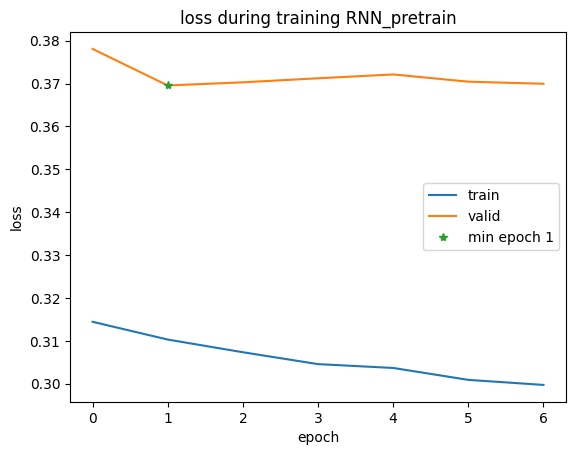

load pretrained model from  ckpt_RNN_pretrain_smiles.pt
[Test] Loss: 0.263
*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,      F1,     AUC,     MCC,     AP
& 0.813  &  0.812  &          0.797  &     0.795  &0.828  &0.796 &0.889 &   0.624 &   0.863


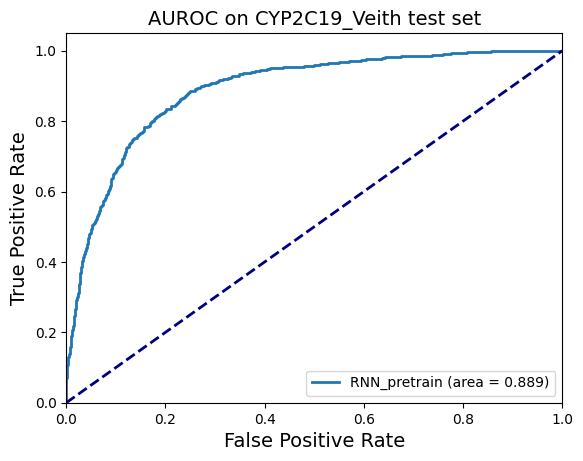

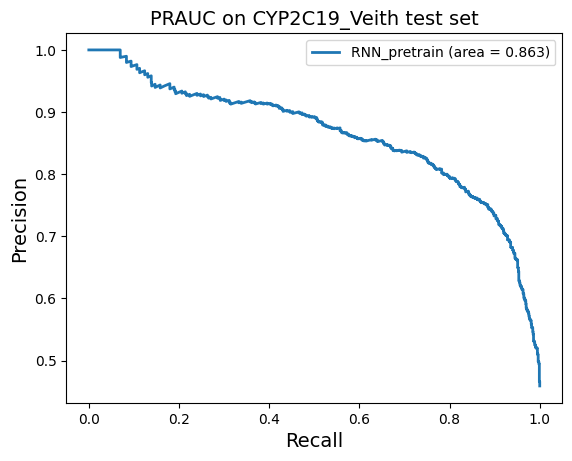


*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,      F1,     AUC,     MCC,     AP
& 0.867  &  0.704  &          0.738  &     0.445  &0.964  &0.555 &0.846 &   0.504 &   0.654


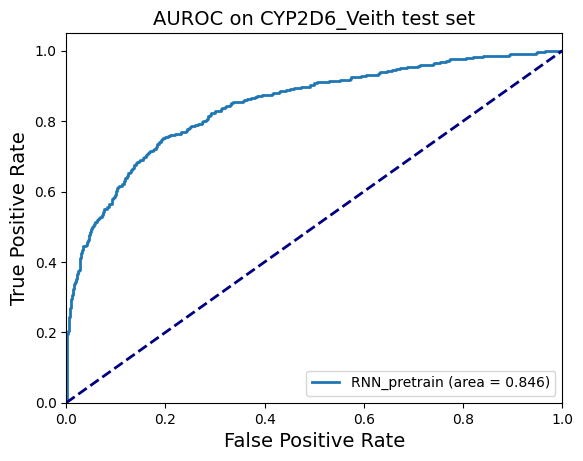

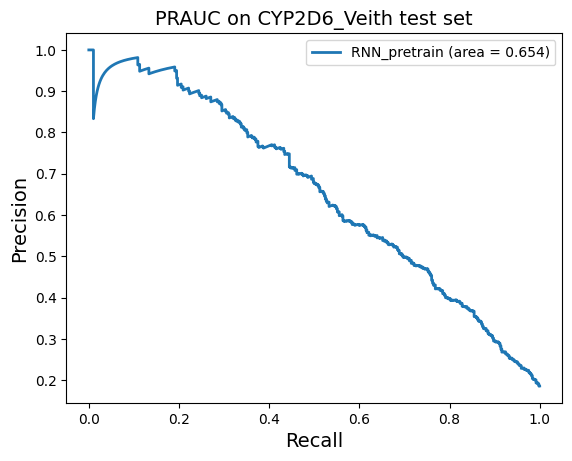


*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,      F1,     AUC,     MCC,     AP
& 0.792  &  0.782  &          0.761  &     0.724  &0.841  &0.742 &0.864 &   0.569 &   0.800


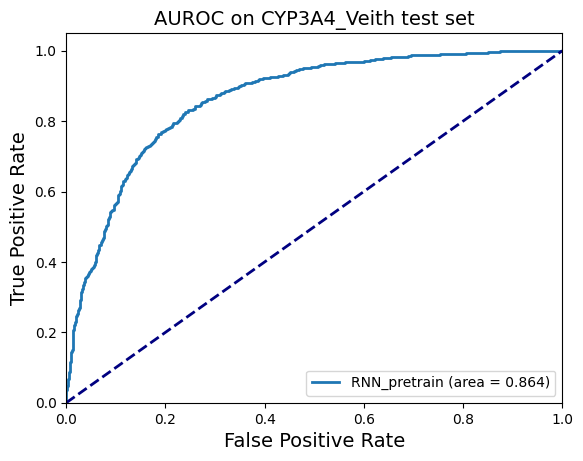

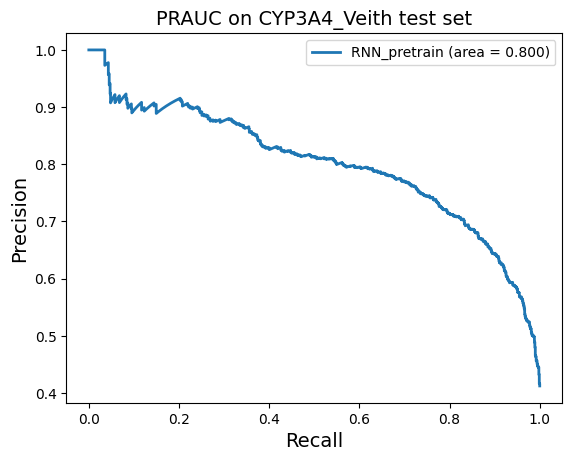


*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,      F1,     AUC,     MCC,     AP
& 0.846  &  0.845  &          0.841  &     0.832  &0.859  &0.836 &0.920 &   0.691 &   0.909


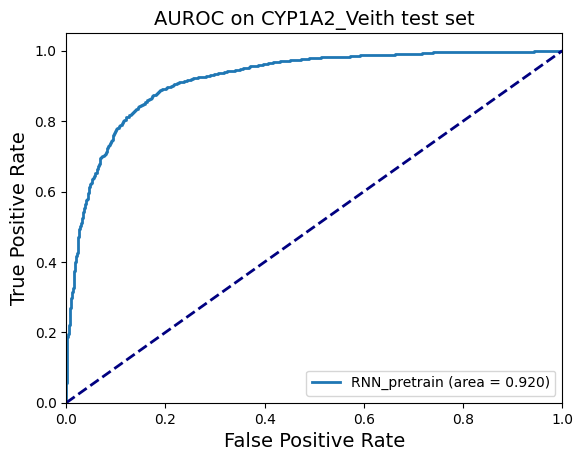

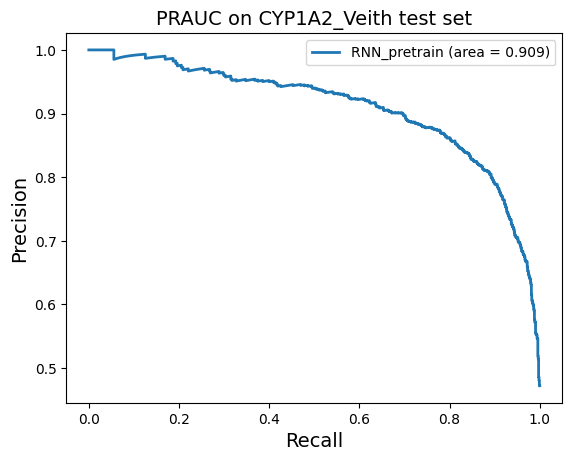


*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,      F1,     AUC,     MCC,     AP
& 0.822  &  0.798  &          0.743  &     0.725  &0.871  &0.734 &0.894 &   0.600 &   0.796


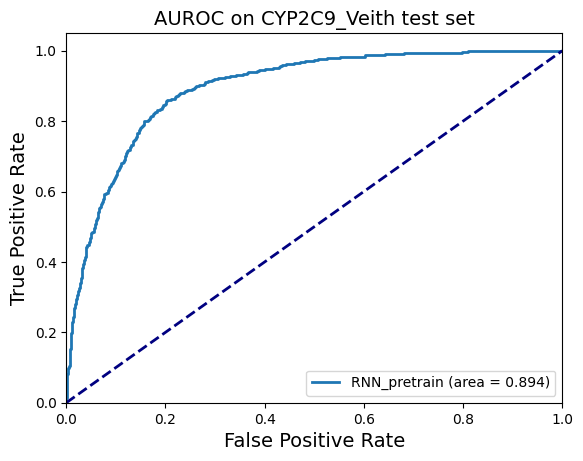

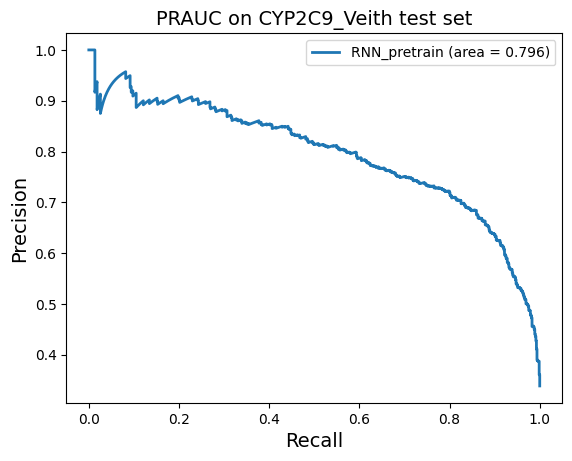



--> Train status saved at ckpt_RNN_pretrain_smiles.yml
Finished evaluate test performance, outputs performance dict


In [10]:
p = models.train(trn_l, val_l, tst_l)

In [9]:
train_epoch_MLP(models.model, trn_l, models.IS_R, models.prop_names, models.device, 0, models.optimizer)

(0.29428851866722106,
 [38.53538344800472,
  34.406315341591835,
  40.29638899862766,
  31.67689797282219,
  39.01533488929272],
 [False, False, False, False, False])

In [8]:

def train_epoch_MLP(model, loader, IS_R, names, device,
                    epoch=None, optimizer=None, MASK=-100,
                    scale_dict=None, weight_loss=None,
                    model_type='model', ver=False):
    """
    param weight_loss: list, the weight of loss for different tasks
    """

    if optimizer==None: # no optimizer, either validation or test
        model.eval()    # model evaluation for either valid or test
        if epoch != None: train_type='Valid' # if epoch is inputted, its valid
        else: train_type = 'Test' # if no epoch information, its test
    else: model.train(); train_type='Train' # if optimizer inputted, its train

    if isinstance(IS_R, list): IS_R_list = IS_R
    else: IS_R_list = [IS_R] * len(names)

    if weight_loss == None: weight_loss = [1.0/len(names)]*len(names)

    total_loss, losses_list, y_probs, y_label = 0, [], {}, {}

    for idx, batch_data in enumerate(loader):
        """
        len(batch_data) could determine which algorithm
        len(batch_data) == 2: MLP, GIN, RNN
        len(batch_data) == 4: AttentiveFP
        """
        if len(batch_data) == 2:  # MLP or GIN or RNN
            fp, labels = batch_data
            fp, labels = fp.to(device), labels.to(device)
            mask = labels == MASK
            pred = model(fp)
        elif len(batch_data) == 4: # attentiveFP
            smiles, bg, labels, masks = batch_data
            bg, labels, masks = bg.to(device), labels.to(device), masks.to(device)
            n_feats = bg.ndata.pop('hv').to(device)
            e_feats = bg.edata.pop('he').to(device)
            pred = model(bg, n_feats, e_feats)
            mask = masks < 1

        batch_loss_list = []
        for j, (name, IS_R, w) in enumerate(zip(names, IS_R_list, weight_loss)):
            loss_func = get_loss_fn(IS_R)
            probs = pred[:, j][~mask[:, j]]
            label = labels[:, j][~mask[:, j]]

            len_here = label.shape[0] # num of data with labels
            loss_here = loss_func(probs, label)
            if len_here != 0:
                loss_here /= len_here
                batch_loss_list.append(loss_here.item())
            else:       batch_loss_list.append(float(0))

            if j == 0: loss  = loss_here * w
            else:      loss += loss_here * w

            if IS_R == False: probs = F.sigmoid(probs)

            if train_type != 'Train': # valid or test, output probs and labels
                                      # if train, no process prob to save time
                probs = probs.cpu().detach().numpy().tolist()
                label = label.cpu().detach().numpy().tolist()
                if scale_dict != None:
                    if name in scale_dict.keys():
                        min_here = scale_dict[name][0]
                        max_here = scale_dict[name][1]
                        del_here = max_here - min_here
                        label = [l * del_here + min_here for l in label]
                        probs = [p * del_here + min_here for p in probs]

                if idx ==0: y_probs[name], y_label[name] = probs, label
                else:    y_probs[name] += probs; y_label[name] += label

        if len(losses_list) == 0:               losses_list = batch_loss_list
        else: losses_list = [i+j for i, j in zip(losses_list, batch_loss_list)]

        total_loss += loss.item()

        if optimizer != None:
            optimizer.zero_grad(); loss.backward(); optimizer.step()

    total_loss /= len(loader) # no need /loader.dataset since has / len_here

    if epoch != None: # train or valid
        if ver: print(f'Epoch:{epoch}, [{train_type}] Loss: {total_loss:.3f}')

    elif epoch == None: # test
        print(f'[{train_type}] Loss: {total_loss:.3f}')

        performance = eval_dict(y_probs, y_label, names, IS_R_list,
                                model_type=model_type, draw_fig=True)
        performance['loss'] = float(total_loss)
    # for i in range(len(losses_list)):
    #     if IS_R_list[i] == True: losses_list[i] /= 2
    IS_R = IS_R_list
    if   train_type == 'Train': return total_loss, losses_list, IS_R # train
    elif train_type == 'Valid': return total_loss,  y_probs, y_label # valid
    else:                       return performance, y_probs, y_label # test

